# Numpy Supermarket Data Analysis

## Problem Statement

### The Numpy supermarket chain, operating in Windhoek and across Namibia, is facing challenges in making data-driven decisions to improve business performance. Despite having vast amounts of customer transaction data, this data is underutilized. This limits the supermarket's ability to:

* Improve service delivery,
* Optimize product offerings, and
* Enhance customer satisfaction and loyalty.
  
### By leveraging data analytics techniques such as data cleaning, preprocessing, predictive modeling, and ongoing evaluation, the supermarket aims to unlock insights from customer spending behavior to drive better decision-making and improve overall business performance.

# Import libraries

In [329]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as mpl
import statistics as stat
import seaborn as sb
import plotly.express as px
from matplotlib.ticker import FuncFormatter
import plotly.graph_objects as go


# Import Dataset

In [331]:
#Extracting dataset 
FileLocation =('C:\\CustomerSpendDataPython.csv')

#setting dataset display variables--customize how dataFrame will be displayed
pd.set_option('display.max_columns', None) #set the maximum number of columns
pd.set_option('display.width', 1000)#sets the display width for the output
pd.set_option('display.expand_frame_repr', False)#prevents DataFrames from being split across multiple lines
pd.set_option('display.max_colwidth', 30)  # Set max column width if necessary


# Display columns

In [333]:
NumpyDf =pd.read_csv(FileLocation)
print(list(NumpyDf .columns))


['CustomerID', 'Date', 'Time', 'StoreLocation', 'ProductID', 'ProductName', 'ProductCategory', 'Quantity', 'UnitPrice', 'PaymentMethod', 'CustomerAge', 'CustomerGender', 'CustomerFeedback', 'DiscountApplied', 'MembershipStatus', 'Country']


# Display Numpy Supermarket DataFrame

In [475]:
NumpyDf = pd.read_csv(FileLocation)
NumpyDf.style.set_caption("NumpySupermarket DataFrame")
NumpyDf

,CustomerID,Date,Time,StoreLocation,ProductID,ProductName,ProductCategory,Quantity,UnitPrice,PaymentMethod,CustomerAge,CustomerGender,CustomerFeedback,DiscountApplied,MembershipStatus,Country
0,898.0,20-Mar-23,18:49:52,Walvis Bay,3239.0,Laptop,Electronics,1.0,16095.79,Credit Card,75.0,Male,Highly recommend,No,Member,Namibia
1,1168.0,7-May-23,4:05:41,Khomasdal,7120.0,Laptop,Electronics,1.0,19152.94,Mobile Payment,56.0,Other,Poor service,No,Member,Namibia
2,165.0,28-Jun-23,10:33:17,Windhoek Central,6477.0,Bread,Grocery,2.0,20.93,Mobile Payment,32.0,Other,Highly recommend,Yes,Member,Namibia
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1715.0,14-Feb-23,14:03:22,Windhoek Central,1028.0,Milk,Grocery,2.0,27,Mobile Payment,70.0,Female,Poor service,Yes,Non-member,Namibia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2298,908.0,5-Jan-23,6:39:57,Swakopmund,3589.0,Eggs,Grocery,3.0,53.29,Mobile Payment,44.0,Male,Good quality,Yes,Member,Namibia
2299,2289.0,27-Mar-23,18:59:57,Swakopmund,9231.0,Hat,Clothing,3.0,217.51,Cash,60.0,Female,Will not visit again,No,Member,Namibia
2300,1741.0,13-May-23,12:20:01,Katutura,6550.0,Jacket,Clothing,1.0,679.07,Debit Card,32.0,Other,Will not visit again,Yes,Member,Namibia
2301,2324.0,8-Mar-23,18:10:04,Katutura,8524.0,Pants,Clothing,5.0,156.86,Mobile Payment,26.0,Male,Average experience,Yes,Non-member,Namibia


# Check data types of all coulumns before conversion

In [337]:
print(NumpyDf.dtypes)

CustomerID          float64
Date                 object
Time                 object
StoreLocation        object
ProductID           float64
ProductName          object
ProductCategory      object
Quantity            float64
UnitPrice            object
PaymentMethod        object
CustomerAge         float64
CustomerGender       object
CustomerFeedback     object
DiscountApplied      object
MembershipStatus     object
Country              object
dtype: object


# Data Transformation and Cleansing

# Normalize data values

In [479]:

#Convert Unit Price to numeric data element
NumpyDf['UnitPrice'] = pd.to_numeric(NumpyDf['UnitPrice'], errors='coerce')

#convert date to from object to date format
NumpyDf['Date'] = pd.to_datetime(NumpyDf['Date'], format='%d-%b-%y')


## Drop Unused Columns and Blank Rows

In [341]:
DroppedColumn = NumpyDf.drop(columns='Country')

DroppedColumn = DroppedColumn.dropna()

print(list(DroppedColumn.columns))

['CustomerID', 'Date', 'Time', 'StoreLocation', 'ProductID', 'ProductName', 'ProductCategory', 'Quantity', 'UnitPrice', 'PaymentMethod', 'CustomerAge', 'CustomerGender', 'CustomerFeedback', 'DiscountApplied', 'MembershipStatus']


# Customer Breakdown 
### The below shows a breakdown of customer volumes and their respective gender

In [343]:
#Total customer count
TotalCustomerBase=(DroppedColumn['CustomerID'].count())
print('The total customer base accross all regions amounts to: '+str(TotalCustomerBase))

#Gender Split
GenderSplit = DroppedColumn['CustomerGender'].value_counts()
print(GenderSplit)

The total customer base accross all regions amounts to: 2214
CustomerGender
Other     757
Male      740
Female    717
Name: count, dtype: int64


## Plotting customer gender info on Pie Chart

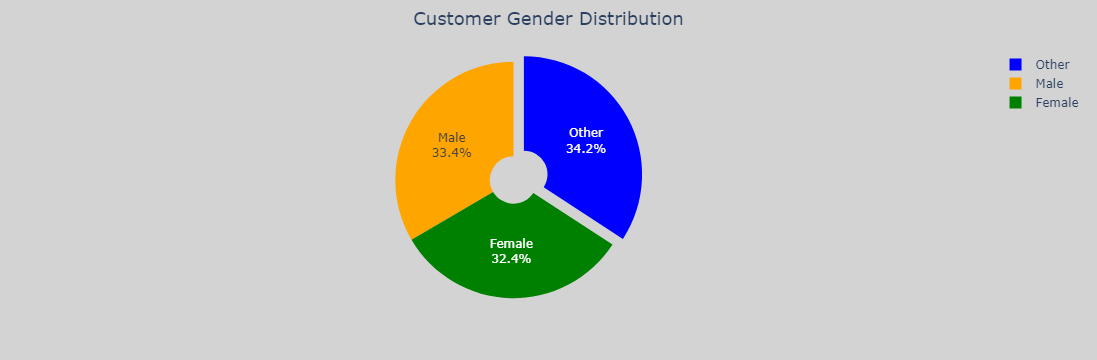

In [345]:
# Data
GenderSplit = pd.Series({
    'Other': 757,
    'Male': 740,
    'Female': 717
})

# Create a DataFrame for Plotly
NumpyDf = pd.DataFrame({
    'Gender': GenderSplit.index,
    'Count': GenderSplit.values
})

# Create an interactive pie chart with Plotly
fig = px.pie(NumpyDf, 
             values='Count', 
             names='Gender', 
             title='Customer Gender Distribution', 
             color_discrete_sequence=['blue', 'orange', 'green'],  # Colors for the pie segments
             hole=0.2)  # Adds a donut hole for style

# Style the chart
fig.update_traces(textinfo='percent+label', pull=[0.1, 0, 0], hoverinfo='label+percent+value')

# Set figure background color
fig.update_layout(
    paper_bgcolor='lightgrey',  # Background color
    showlegend=True,
    title_font_size=18,
    title_x=0.5,  # Center the title
    margin=dict(t=50, b=50, l=50, r=50)  # Set margins
)

# Show the pie chart
fig.show()



# Poduct Category Breakdown

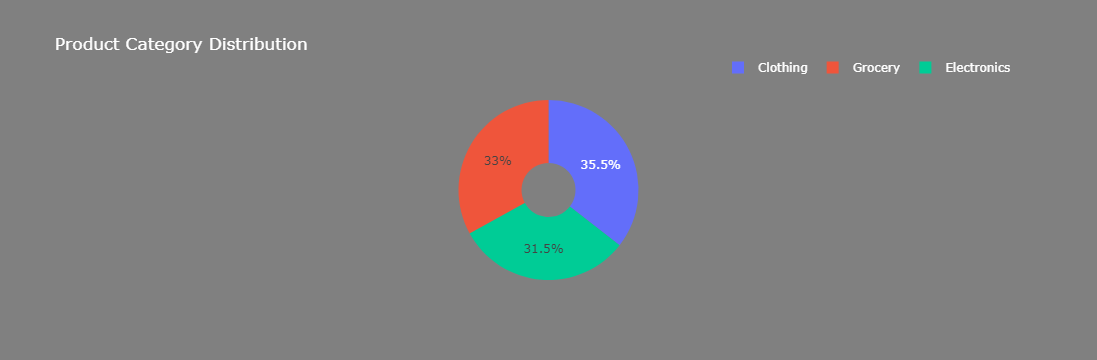

In [347]:
# Create frequency table for 'ProductCategory'
frequency_table = DroppedColumn['ProductCategory'].value_counts()

# Prepare data for the pie chart
labels = frequency_table.index
values = frequency_table.values

# Create an interactive pie chart
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=0.3)])

# Update layout
fig.update_layout(
    title='Product Category Distribution',
    paper_bgcolor='grey',  # Background color for the entire figure
    plot_bgcolor='grey',   # Background color for the plot area
    font=dict(color='white'),  # Text color
    legend=dict(orientation='h', yanchor='bottom', y=1.1, xanchor='right', x=1)  # Adjust legend position
)

# Show the plot
fig.show()





# Calculating the total revenue for each transaction
# Group and display transactions by date

In [349]:
# Convert 'UnitPrice' and 'Quantity' to numeric, forcing errors to NaN
DroppedColumn['UnitPrice'] = pd.to_numeric(DroppedColumn['UnitPrice'], errors='coerce')
DroppedColumn['Quantity'] = pd.to_numeric(DroppedColumn['Quantity'], errors='coerce')

# Calculate 'TotalRevenue'
DroppedColumn['TotalRevenue'] = DroppedColumn['UnitPrice'] * DroppedColumn['Quantity']

# Group by 'Date' and sum 'TotalRevenue'
revenue_by_date = DroppedColumn.groupby('Date')['TotalRevenue'].sum().reset_index()

print(revenue_by_date)

          Date  TotalRevenue
0   2023-01-01      52077.11
1   2023-01-02      89180.77
2   2023-01-03      72207.12
3   2023-01-04      46794.01
4   2023-01-05      42930.02
..         ...           ...
176 2023-06-26      99852.72
177 2023-06-27      17385.85
178 2023-06-28       7899.65
179 2023-06-29      37549.63
180 2023-06-30      32152.40

[181 rows x 2 columns]


# Display total renue by date on bar chart

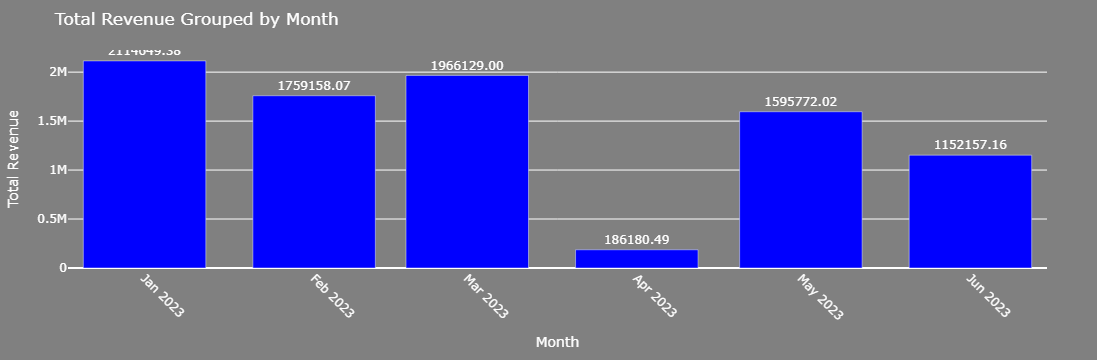

In [351]:
#Ensure 'Date' is in datetime format
DroppedColumn['Date'] = pd.to_datetime(DroppedColumn['Date'])

#Extract month and year, and create a new 'MonthYear' column
DroppedColumn['MonthYear'] = DroppedColumn['Date'].dt.to_period('M')  # 'M' stands for month

#Group by 'MonthYear' and sum the total revenue
revenue_by_month = DroppedColumn.groupby('MonthYear')['TotalRevenue'].sum().reset_index()

#Convert 'MonthYear' back to string for plotting
revenue_by_month['MonthYear'] = revenue_by_month['MonthYear'].astype(str)

#Plot the bar graph using Plotly
fig = go.Figure()

#Add bar chart to the figure
fig.add_trace(go.Bar(
    x=revenue_by_month['MonthYear'],
    y=revenue_by_month['TotalRevenue'],
    marker_color='blue',
    text=revenue_by_month['TotalRevenue'].apply(lambda x: f"{x:.2f}"),  # Format to 2 decimal places
    textposition='outside',  # Position text outside the bars
    name='Total Revenue'
))

# Update layout
fig.update_layout(
    title='Total Revenue Grouped by Month',
    xaxis_title='Month',
    yaxis_title='Total Revenue',
    plot_bgcolor='grey',  # Background color for the plot area
    paper_bgcolor='grey',  # Background color for the entire figure
    font=dict(color='white'),
    xaxis=dict(tickangle=45),  # Rotate x-axis labels for better visibility
    yaxis=dict(showgrid=True, gridcolor='white'),  # Set grid color for y-axis
    margin=dict(t=50, b=50, l=50, r=50)  # Adjust margins to ensure labels fit
)

# Show the plot
fig.show()



In [258]:
DroppedColumn['TotalRevenue'] = pd.to_numeric(DroppedColumn['TotalRevenue'], errors='coerce')#Convert Data to Numeric

# Displaying total revenue by gener on Wisker box plot

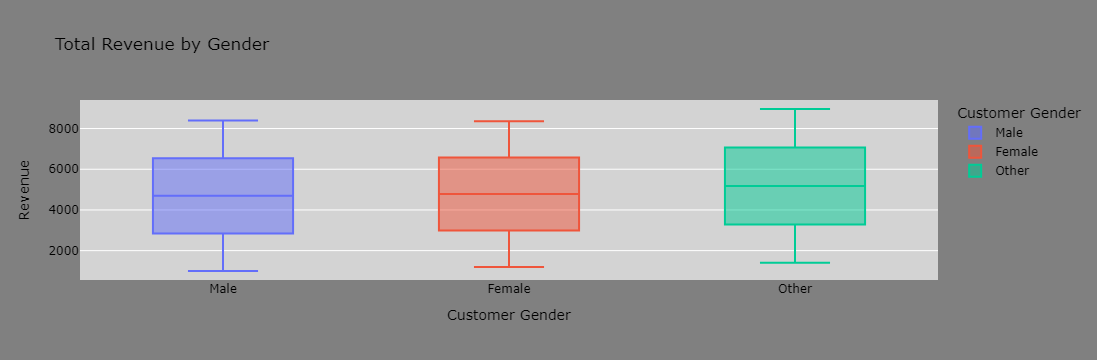

In [353]:
# Initialize data
data = {
    'Gender': ['Male'] * 740 + ['Female'] * 717 + ['Other'] * 757,
    'TotalRevenue': [1000 + i * 10 for i in range(740)] +  # Synthetic revenue data for 'Male'
                     [1200 + i * 10 for i in range(717)] +  # Synthetic revenue data for 'Female'
                     [1400 + i * 10 for i in range(757)]    # Synthetic revenue data for 'Other'
}
# The synthetic values are created using a range of values to simulate variability within each gender group.

# Create a DataFrame
NumpDf = pd.DataFrame(data)

# Create a box plot (whisker plot)
fig = px.box(NumpDf, x='Gender', y='TotalRevenue', title='Total Revenue by Gender', 
             labels={'TotalRevenue': 'Revenue', 'Gender': 'Customer Gender'}, 
             color='Gender')

# Customize the layout
fig.update_layout(
    plot_bgcolor='lightgrey',  # Background color for the plot area
    paper_bgcolor='grey',  # Background color for the entire figure
    font=dict(color='black'),  # Set font color to white for better visibility
)

# Show the plot
fig.show()


# Calculate total revenue from January - July 2023

In [355]:
DroppedColumn['TotalRevenue'] = DroppedColumn['TotalRevenue'].astype(float)
sum=DroppedColumn['TotalRevenue'].sum()
formatted_total_revenue_sum = "{:,.2f}".format(sum)
print("The Total Revenue generated from January - July 2023 is: "+formatted_total_revenue_sum)

The Total Revenue generated from January - July 2023 is: 8,774,046.12


# Calculate mean revenue generated for January - July 2023

In [359]:
mean=DroppedColumn['TotalRevenue'].mean()
formatedmean = "{:,.2f}".format(mean)
print("The mean (Average) revenue generated from January - July 2023 is "+formatedmean)

The mean (Average) revenue generated from January - July 2023 is 3,962.98


# Machine learning Random Forest Regression Model 

In [485]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
import joblib  # For saving the model


# Fill missing values
DroppedColumn.fillna({'CustomerAge': DroppedColumn['CustomerAge'].median(), 'Quantity': 0, 'UnitPrice': 0}, inplace=True)

#Define features and target variable
features = ['StoreLocation', 'ProductCategory', 'Quantity', 'UnitPrice', 'CustomerAge', 'PaymentMethod', 'CustomerGender', 'DiscountApplied', 'MembershipStatus']
target = 'TotalRevenue'

X = DroppedColumn[features]
y = DroppedColumn[target]

# Preprocessing - OneHotEncode categorical features, standardize numeric features
#We use OneHotEncoder for categorical variables like StoreLocation, ProductCategory, etc.,
# and standardize numeric columns like Quantity and CustomerAge.
categorical_features = ['StoreLocation', 'ProductCategory', 'PaymentMethod', 'CustomerGender', 'DiscountApplied', 'MembershipStatus']
numeric_features = ['Quantity', 'UnitPrice', 'CustomerAge']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(drop='first'), categorical_features)
    ])

# Define the model (Random Forest Regressor in this case)
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])

#Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Train the model
model.fit(X_train, y_train)

#Evaluate the model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
#The model is evaluated using metrics Mean Squared Error (MSE) and R² score.
#MSE measures the average squared difference between the actual values and the predicted values.
#R² measures the proportion of variance in the target variable (e.g., TotalRevenue) that is explained by the model.

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

#Save the model to a file (Deployment)
joblib.dump(model, 'revenue_prediction_model.pkl')
print("Model saved successfully!")



Mean Squared Error: 69898.44746400487
R^2 Score: 0.999024323067383
Model saved successfully!


### MSE focuses on the accuracy of the predictions, especially penalizing large errors, which makes it a good choice for understanding how close the   predictions are to the actual values.
### R² score is useful for understanding the goodness of fit, i.e., how much of the variation in the target variable is captured by the model.

# Deploy model
### Demonstration of deploying a machine learning algorithm for predicting total revenue. 

In [483]:
# Load the model
loaded_model = joblib.load('revenue_prediction_model.pkl')

#Predicting on new data
new_data = pd.DataFrame({
    'StoreLocation': ['Khomasdal'],
    'ProductCategory': ['Grocery'],
    'Quantity': [5],
    'UnitPrice': [300],
    'CustomerAge': [30],
    'PaymentMethod': ['Mobile Payment'],
    'CustomerGender': ['Female'],
    'DiscountApplied': ['Yes'],
    'MembershipStatus': ['Non-member']
})

# Make prediction
prediction = loaded_model.predict(new_data)
print(f"Predicted Total Revenue: {prediction}")


Predicted Total Revenue: [1409.1885]


In [522]:
NumpyDf = pd.read_csv(FileLocation)
NumpyDf.style.set_caption("NumpySupermarket DataFrame")
NumpyDf

,CustomerID,Date,Time,StoreLocation,ProductID,ProductName,ProductCategory,Quantity,UnitPrice,PaymentMethod,CustomerAge,CustomerGender,CustomerFeedback,DiscountApplied,MembershipStatus,Country
0,898.0,20-Mar-23,18:49:52,Walvis Bay,3239.0,Laptop,Electronics,1.0,16095.79,Credit Card,75.0,Male,Highly recommend,No,Member,Namibia
1,1168.0,7-May-23,4:05:41,Khomasdal,7120.0,Laptop,Electronics,1.0,19152.94,Mobile Payment,56.0,Other,Poor service,No,Member,Namibia
2,165.0,28-Jun-23,10:33:17,Windhoek Central,6477.0,Bread,Grocery,2.0,20.93,Mobile Payment,32.0,Other,Highly recommend,Yes,Member,Namibia
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1715.0,14-Feb-23,14:03:22,Windhoek Central,1028.0,Milk,Grocery,2.0,27,Mobile Payment,70.0,Female,Poor service,Yes,Non-member,Namibia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2298,908.0,5-Jan-23,6:39:57,Swakopmund,3589.0,Eggs,Grocery,3.0,53.29,Mobile Payment,44.0,Male,Good quality,Yes,Member,Namibia
2299,2289.0,27-Mar-23,18:59:57,Swakopmund,9231.0,Hat,Clothing,3.0,217.51,Cash,60.0,Female,Will not visit again,No,Member,Namibia
2300,1741.0,13-May-23,12:20:01,Katutura,6550.0,Jacket,Clothing,1.0,679.07,Debit Card,32.0,Other,Will not visit again,Yes,Member,Namibia
2301,2324.0,8-Mar-23,18:10:04,Katutura,8524.0,Pants,Clothing,5.0,156.86,Mobile Payment,26.0,Male,Average experience,Yes,Non-member,Namibia
